In [1]:
# Azeez Folayemi Adebayo
# 226113001
# Mechatronic Engineering Department
# SINAV
# VERİ BİLİMİ İÇİN PROGRAMLAMA DERSİ UYGULAMA SINAVI

In [2]:
'''
1. Load the superstore data into a Pandas DataFrame.
'''

'\n1. Load the superstore data into a Pandas DataFrame.\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   


# Load the superstore data into a Pandas DataFrame:
# Assuming the data is stored in a CSV file named "superstore_data.csv"

file_path = "/home/hazeezadebayo/Pictures/superstore_dataset2011-2015.csv"
df = pd.read_csv(file_path, encoding='latin-1')
print("df.shape: ", df.shape)
df.head(4)


df.shape:  (51290, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High


In [4]:
# Get the columns names
df.columns.values 

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Postal Code', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype=object)

In [5]:
''' 
2. Clean the data by addressing missing values, duplicates and other necessary 
  data cleaning steps. clean it.
- Check for missing values in the dataset and choose the appropriate method 
  to process them. determine (e.g., completion, extraction).
- Identify and remove any duplicate rows in the dataset.
- Perform any other data cleaning steps necessary to ensure the data is ready 
  for analysis.
'''

' \n2. Clean the data by addressing missing values, duplicates and other necessary \n  data cleaning steps. clean it.\n- Check for missing values in the dataset and choose the appropriate method \n  to process them. determine (e.g., completion, extraction).\n- Identify and remove any duplicate rows in the dataset.\n- Perform any other data cleaning steps necessary to ensure the data is ready \n  for analysis.\n'

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nmissing_values: \n", missing_values)

missing_percentage = (missing_values / len(df)) * 100
print("\nmissing_percentage: \n", missing_percentage)

df = df.fillna("00000")

# check if rows with missing still exists
if df[df.isna().any(axis=1)].shape[0] == 0:
    print("\nno rows_with_missing_values.")



# Remove duplicate rows
# df.drop_duplicates(inplace=True)
duplicate_rows = df.duplicated()
if duplicate_rows.any():
    duplicate_rows_true = df[duplicate_rows]
    # Perform operations on duplicate_rows_true
    print("\nduplicate_rows shape :", duplicate_rows_true.shape)
    # how many duplicates actually exists?
    duplicate_count = duplicate_rows.sum()
    # delete or remove the duplicates from the df.
    df = df[~duplicate_rows]
else:
    print("\nNo duplicate rows found.")



# Other data cleaning steps 
# dates should be converted to the datetime data type.
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.head(2)




missing_values: 
 Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

missing_percentage: 
 Row ID             0.00000
Order ID           0.00000
Order Date         0.00000
Ship Date          0.00000
Ship Mode          0.00000
Customer ID        0.00000
Customer Name      0.00000
Segment            0.00000
City               0.00000
State              0.00000
Country            0.00000
Postal Code       80.51472
Market             0.00000
Region            

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


In [7]:
''' 
3. Gain insights from the dataset by performing exploratory data analysis (EDA). 
   This should include the following:
- Summary statistics of sales data.
- Calculate key statistics such as mean, median, standard deviation and percentile
  ranges for relevant columns.
- Using descriptive statistics to understand the distribution and variability of 
  the data.
'''

' \n3. Gain insights from the dataset by performing exploratory data analysis (EDA). \n   This should include the following:\n- Summary statistics of sales data.\n- Calculate key statistics such as mean, median, standard deviation and percentile\n  ranges for relevant columns.\n- Using descriptive statistics to understand the distribution and variability of \n  the data.\n'

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64 


Mean:
Sales            246.490581
Quantity           3.476545
Profit            28.610982
Shipping Cost     26.375915
dtype: float64

Median:
Sales            85.053
Quantity          3.000
Profit            9.240
Shipping Cost     7.790
dtype: float64

Standard Deviation:
Sales            487.565361
Quantity           2.278766
Profit           174.340972
Shipping Cost     57.296804
dtype: float64

25th 50th 75th Percentiles:
           Sales  Quantity  Profit  Shipping Cost
0.25   30.758625       2.0    0.00           2.61
0.50   85.053000       3.0    9.24           7.79
0.75  251.053200       5.0   36.81          24.45


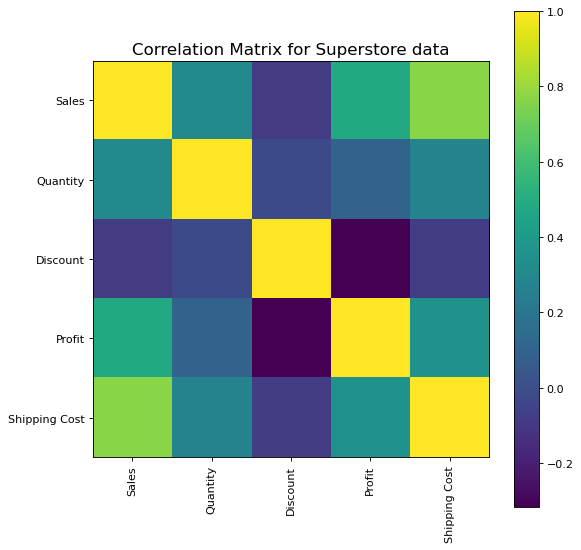

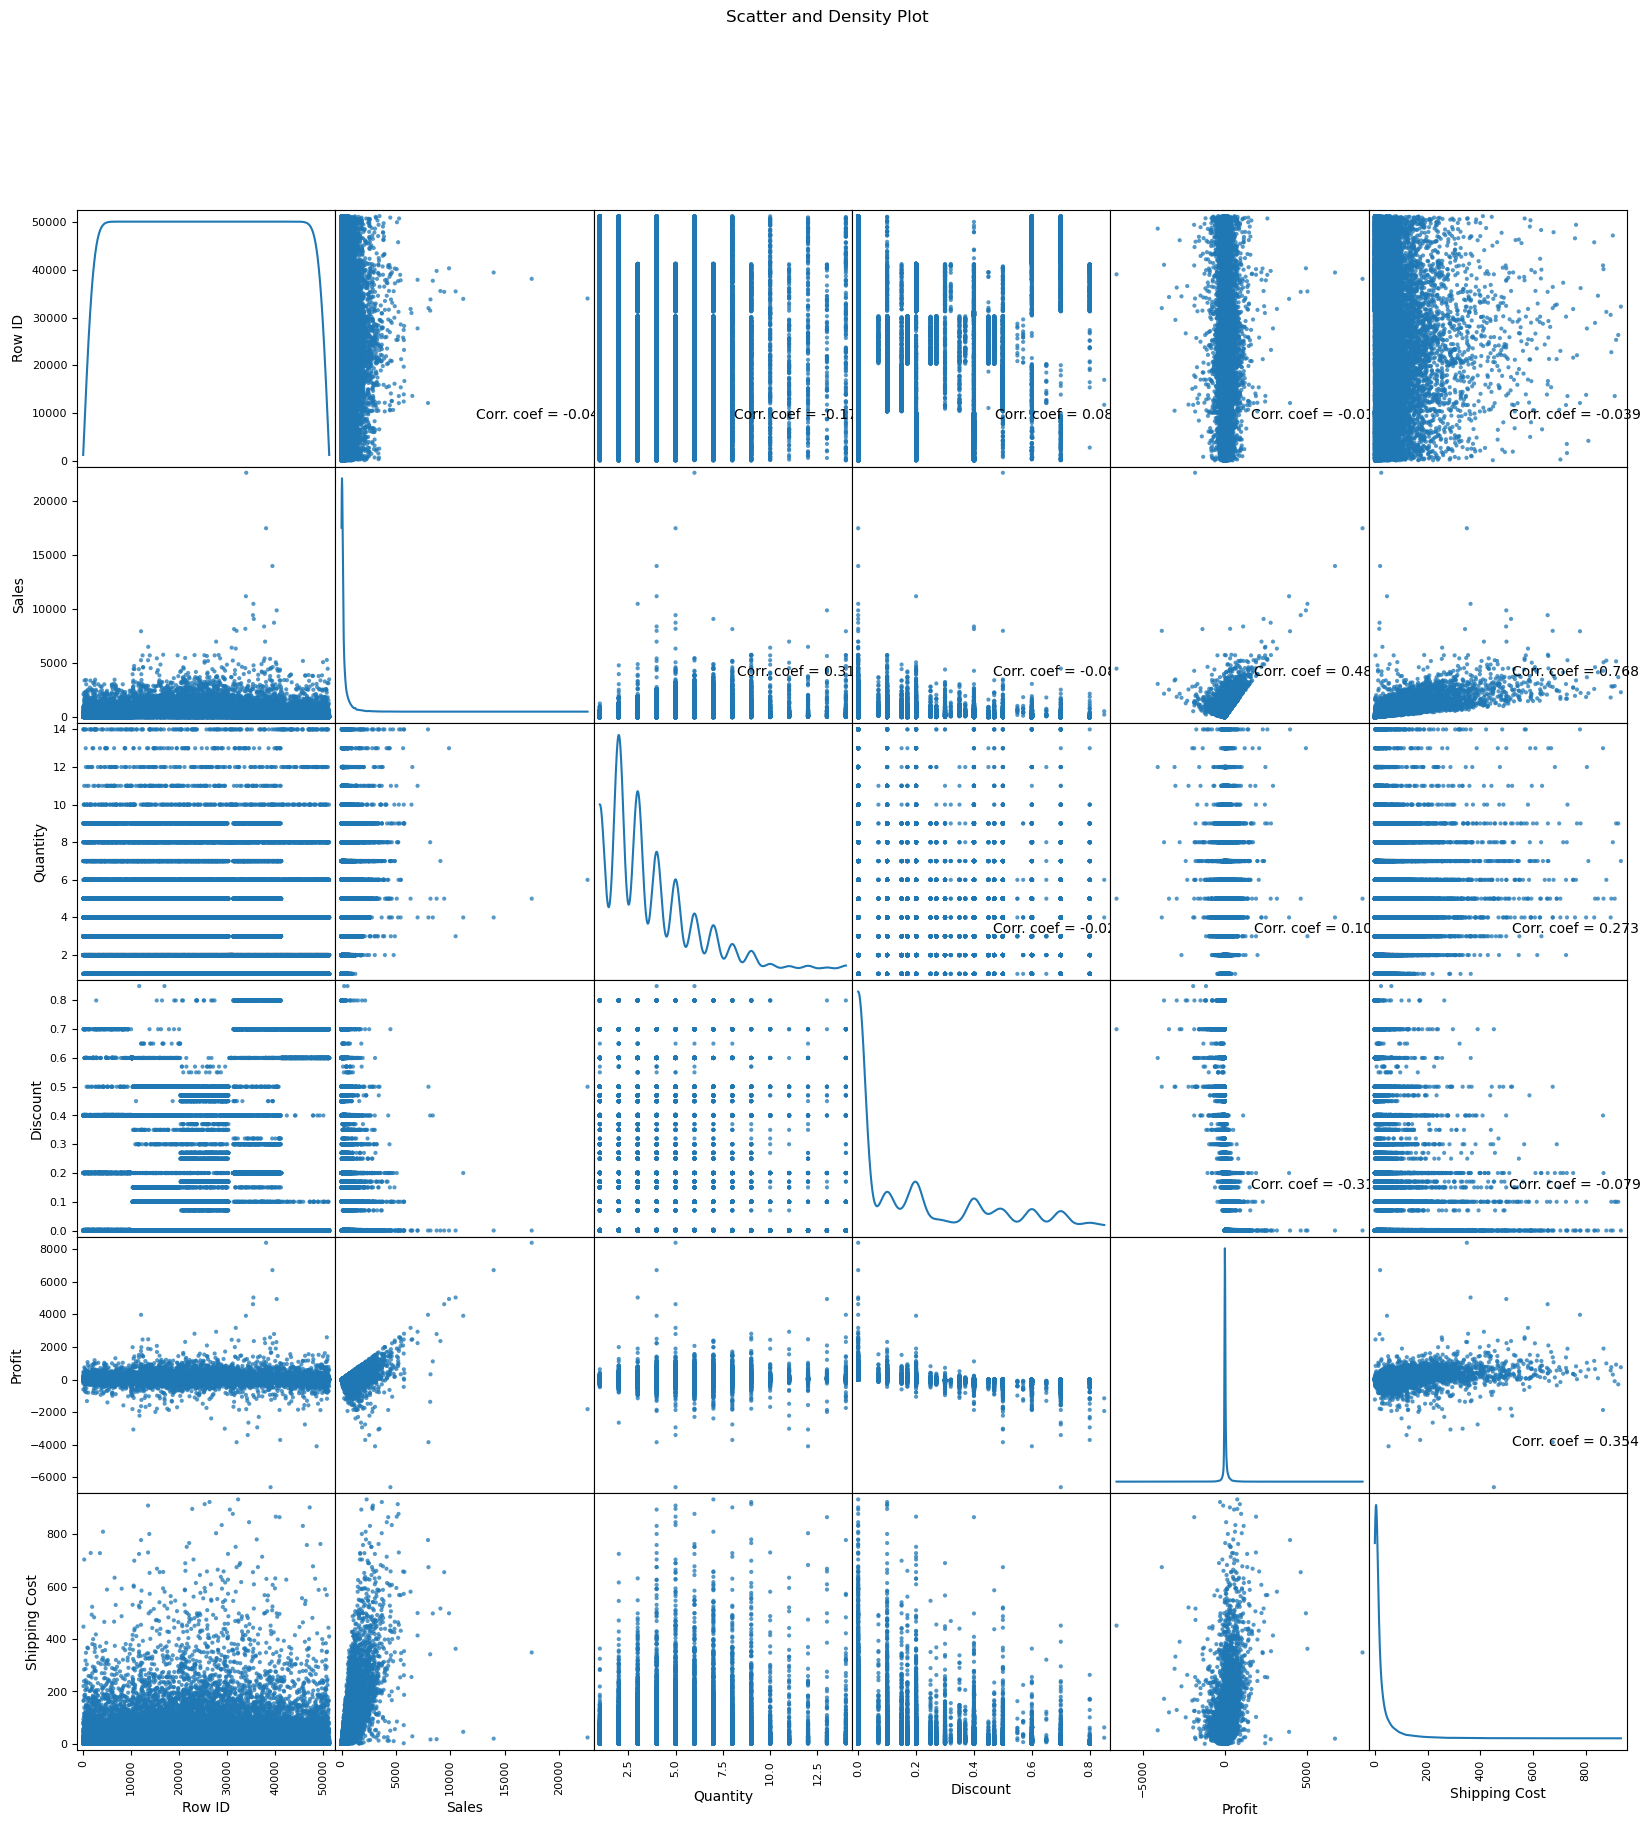

In [8]:
# Perform exploratory data analysis (EDA):
# Summary statistics of sales data
sales_stats = df['Sales'].describe()
print(sales_stats, "\n")

# Calculate mean, median, standard deviation, and percentiles for relevant columns
# Calculate mean
mean_values = df[['Sales', 'Quantity', 'Profit', 'Shipping Cost']].mean()
# Calculate median
median_values = df[['Sales', 'Quantity', 'Profit', 'Shipping Cost']].median()
# Calculate standard deviation
std_values = df[['Sales', 'Quantity', 'Profit', 'Shipping Cost']].std()
# Calculate percentiles (25th, 50th, and 75th)
percentiles = df[['Sales', 'Quantity', 'Profit', 'Shipping Cost']].quantile([0.25, 0.5, 0.75])
# Print key statistics for relevant columns
print("\nMean:")
print(mean_values)
print("\nMedian:")
print(median_values)
print("\nStandard Deviation:")
print(std_values)
print("\n25th 50th 75th Percentiles:")
print(percentiles)


# Exploratory Data Analysis (EDA) involves using visual tools such as:
# histograms, box plots, density plots, scatter plots, and correlation 
# matrices to understand the distribution and variability of the data.

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    corr = df.corr() 
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr.iloc[1:, 1:], fignum=1)  # Exclude the Row ID column
    plt.xticks(range(len(corr.columns)-1), corr.columns[1:], rotation=90)  # Exclude the Row ID label
    plt.yticks(range(len(corr.columns)-1), corr.columns[1:])
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Superstore data', fontsize=15)
    plt.show()

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


# Correlation matrix:
plotCorrelationMatrix(df, 8) 

# Scatter and density plots:
plotScatterMatrix(df, 20, 10)



In [9]:
''' 
4. Answer the following questions using appropriate data analysis techniques and visualizations:
a. What is the overall sales trend for the supermarket? A line to visualize the sales trend create a chart.
- Group the sales data by date and calculate the total sales for each date.
- Use Matplotlib to create a line graph showing the sales trend.
'''

' \n4. Answer the following questions using appropriate data analysis techniques and visualizations:\na. What is the overall sales trend for the supermarket? A line to visualize the sales trend create a chart.\n- Group the sales data by date and calculate the total sales for each date.\n- Use Matplotlib to create a line graph showing the sales trend.\n'

  Order Date     Sales
0 2011-01-01   808.563
1 2011-01-02  2455.670
     Order Date       Sales
1428 2014-12-30  16831.6148
1429 2014-12-31  13257.9543


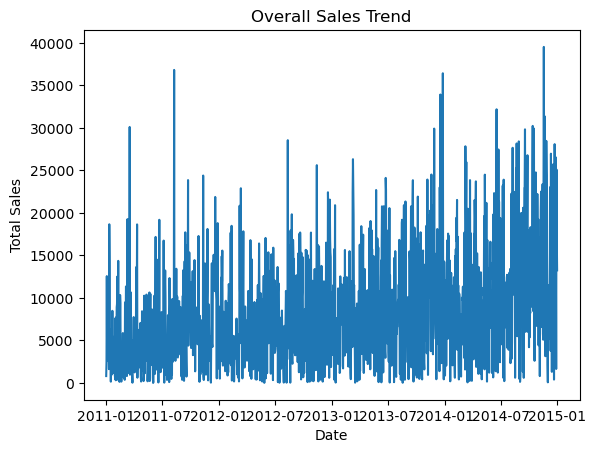

'\nWhat is the overall sales trend for the supermarket? \nThe overall sales trend for the supermarket is positive or upward. \nThis means that the sales are consistently growing or improving \nover the analyzed period.\n'

In [10]:
# a. Overall sales trend:
# Group the sales data by date and calculate the total sales for each date
sales_by_date = df.groupby('Order Date')['Sales'].sum().reset_index()
print(sales_by_date.head(2))
print(sales_by_date.tail(2))

# Create a line graph showing the sales trend
plt.plot(sales_by_date['Order Date'], sales_by_date['Sales'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Overall Sales Trend')
plt.show()


'''
What is the overall sales trend for the supermarket? 
The overall sales trend for the supermarket is positive or upward. 
This means that the sales are consistently growing or improving 
over the analyzed period.
'''


In [11]:
''' 
4. Answer the following questions using appropriate data analysis techniques and visualizations:
b. What are the best-selling product categories? Analyze the sales performance of different categories.
  create a bar chart showing the total sales for each category.
- Group the sales data by product category and show the total sales for each category. Calculate
- A bar showing the sales performance of different categories using Matplotlib create a graph.
'''

' \n4. Answer the following questions using appropriate data analysis techniques and visualizations:\nb. What are the best-selling product categories? Analyze the sales performance of different categories.\n  create a bar chart showing the total sales for each category.\n- Group the sales data by product category and show the total sales for each category. Calculate\n- A bar showing the sales performance of different categories using Matplotlib create a graph.\n'

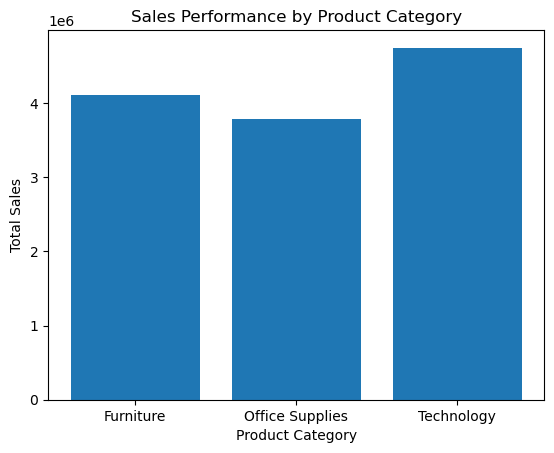

' \nWhat are the best-selling product categories? \nThe total sales value of a category is determined by multiplying the \nnumber of sales (quantity) by the sale price (unit price) of each \nproduct within that category. Therefore, the best-selling category is \nquite typically the one that makes more money and as such are ordered\nbelow;\n\n1. Technology\n2. Furniture\n3. Office Supplies\n'

In [12]:
# b. Best-selling product categories:
# Group the sales data by product category and calculate the total sales for each category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

# Create a bar chart showing the total sales for each category
plt.bar(sales_by_category['Category'], sales_by_category['Sales'])
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Sales Performance by Product Category')
plt.show()

''' 
What are the best-selling product categories? 
The total sales value of a category is determined by multiplying the 
number of sales (quantity) by the sale price (unit price) of each 
product within that category. Therefore, the best-selling category is 
quite typically the one that makes more money and as such are ordered
below;

1. Technology
2. Furniture
3. Office Supplies
'''



In [13]:
''' 
4. Answer the following questions using appropriate data analysis techniques and visualizations:
c. How does sales performance vary between different regions? To compare sales Create a stacked bar chart or a grouped bar chart.
- Group the sales data by region and calculate the total sales for each region.
- To compare sales between different regions using Matplotlib Create a stacked bar chart or a grouped bar chart.
'''

' \n4. Answer the following questions using appropriate data analysis techniques and visualizations:\nc. How does sales performance vary between different regions? To compare sales Create a stacked bar chart or a grouped bar chart.\n- Group the sales data by region and calculate the total sales for each region.\n- To compare sales between different regions using Matplotlib Create a stacked bar chart or a grouped bar chart.\n'

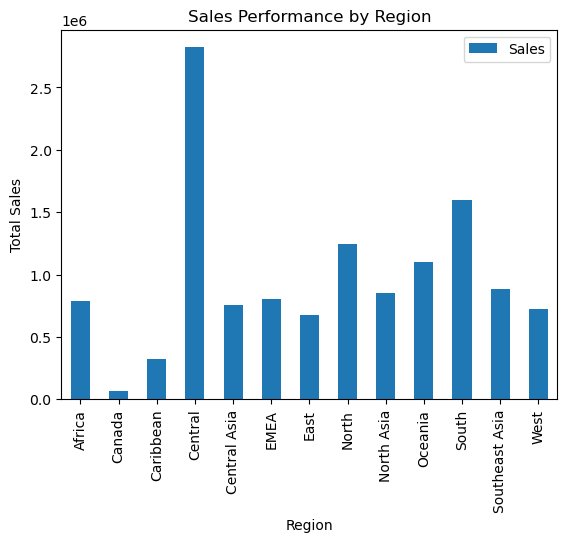

' \nHow does sales performance vary between different regions? \nSince sales has to do with quantity and price. The plot below implies that "Central" region\nhas the heighest purchasing power and as such, highest sales. and "Canada" region has \nthe lowest sales.\n'

In [14]:
# c. Sales performance by region:
# Group the sales data by region and calculate the total sales for each region
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

# Create a stacked bar chart or a grouped bar chart to compare sales between different regions
sales_by_region.plot(x='Region', y='Sales', kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales Performance by Region')
plt.show()

''' 
How does sales performance vary between different regions? 
Since sales has to do with quantity and price. The plot below implies that "Central" region
has the heighest purchasing power and as such, highest sales. and "Canada" region has 
the lowest sales.
'''


In [15]:
''' 
4. Answer the following questions using appropriate data analysis techniques and visualizations:
d. Is there a relationship between the discount offered and the profit margin? Calculate the 
   correlation coefficient and create a scatter plot to visualize the relationship.
- Calculate the correlation coefficient between the discount and profit columns.
- Use Matplotlib to create a scatter plot showing the relationship between discount and profit.
'''

' \n4. Answer the following questions using appropriate data analysis techniques and visualizations:\nd. Is there a relationship between the discount offered and the profit margin? Calculate the \n   correlation coefficient and create a scatter plot to visualize the relationship.\n- Calculate the correlation coefficient between the discount and profit columns.\n- Use Matplotlib to create a scatter plot showing the relationship between discount and profit.\n'

Correlation between Discount and Profit: -0.3164901718272709


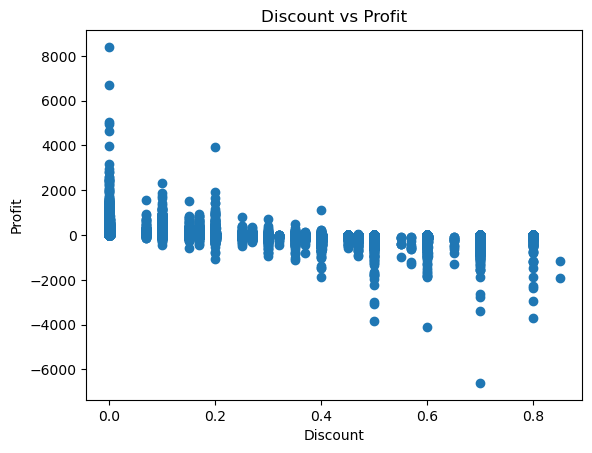

' \nIs there a relationship between the discount offered and the profit margin? \nThe negative sign indicates that there is an inverse relationship betSween the two variables. \nIn other words, as the discount increases, the profit tends to decrease.\nAlso, the magnitude of the correlation coefficient (-0.316) indicates the strength of the \nrelationship. Since it is closer to zero, it suggests a moderate correlation.\n'

In [16]:
# d. Relationship between discount and profit:
# Calculate the correlation coefficient between the discount and profit columns
corr = df['Discount'].corr(df['Profit'])
print('Correlation between Discount and Profit:', corr)

# Create a scatter plot to visualize the relationship between discount and profit
plt.scatter(df['Discount'], df['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Discount vs Profit')
plt.show()

''' 
Is there a relationship between the discount offered and the profit margin? 
The negative sign indicates that there is an inverse relationship betSween the two variables. 
In other words, as the discount increases, the profit tends to decrease.
Also, the magnitude of the correlation coefficient (-0.316) indicates the strength of the 
relationship. Since it is closer to zero, it suggests a moderate correlation.
'''


In [17]:
''' 
4. Answer the following questions using appropriate data analysis techniques and visualizations:
e. What is the distribution of sales by product subcategory? Create a histogram or pie chart to represent the distribution of sales.
- Group the sales data by product subcategory and for each subcategory calculate total sales.
- Represent the distribution of sales between different subcategories using Matplotlib Create a histogram or pie chart.
'''

' \n4. Answer the following questions using appropriate data analysis techniques and visualizations:\ne. What is the distribution of sales by product subcategory? Create a histogram or pie chart to represent the distribution of sales.\n- Group the sales data by product subcategory and for each subcategory calculate total sales.\n- Represent the distribution of sales between different subcategories using Matplotlib Create a histogram or pie chart.\n'


Total sales for each Sub-Category:
 Sub-Category
Accessories    7.492370e+05
Appliances     1.011064e+06
Art            3.720920e+05
Binders        4.619115e+05
Bookcases      1.466572e+06
Chairs         1.501682e+06
Copiers        1.509436e+06
Envelopes      1.709043e+05
Fasteners      8.324232e+04
Furnishings    3.855783e+05
Labels         7.340403e+04
Machines       7.790601e+05
Paper          2.442917e+05
Phones         1.706824e+06
Storage        1.127086e+06
Supplies       2.430742e+05
Tables         7.570419e+05
Name: Sales, dtype: float64


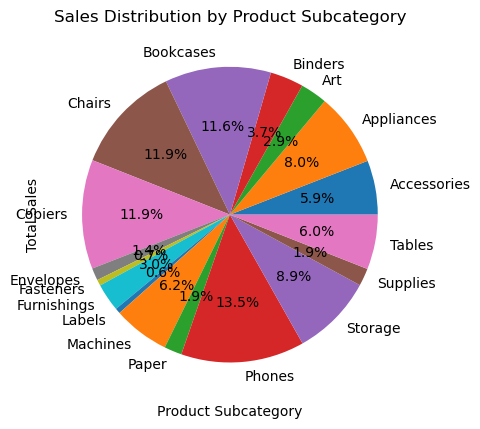

           Category Sub-Category         Sales
1         Furniture       Chairs  1.501682e+06
11  Office Supplies      Storage  1.127086e+06
16       Technology       Phones  1.706824e+06


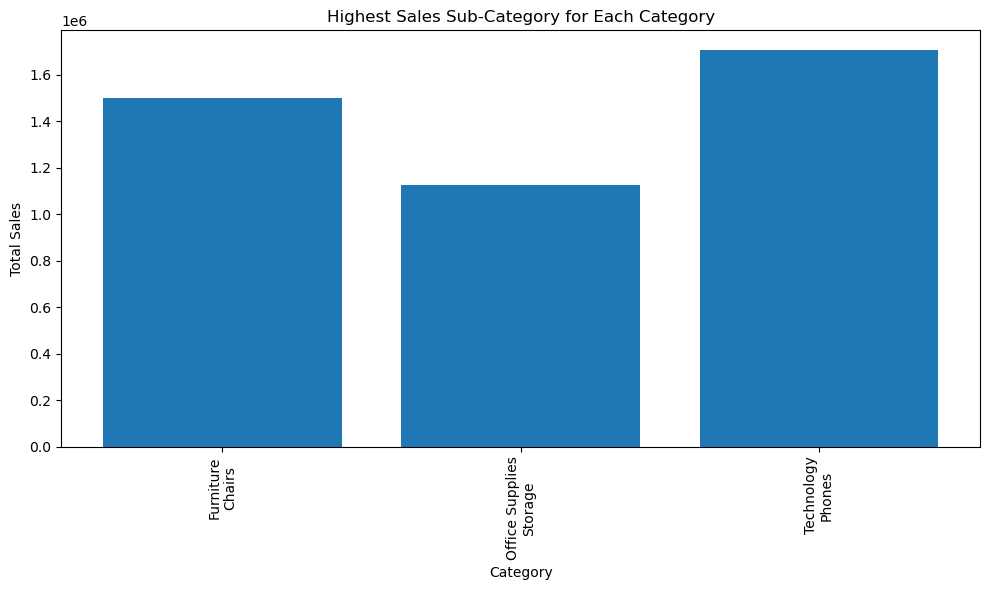

In [18]:
# e. Distribution of sales by product subcategory:
# Group the sales data by product subcategory and calculate the total sales for each subcategory
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum()
# Print the total sales for each category
print("\nTotal sales for each Sub-Category:\n", subcategory_sales)
# Create a histogram or pie chart to represent the distribution of sales
subcategory_sales.plot(x='Sub-Category', y='Sales', kind='pie', autopct='%1.1f%%')
# subcategory_sales.plot(x='Sub-Category', y='Sales', kind='bar')
plt.xlabel('Product Subcategory')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Product Subcategory')
plt.show()


''' 
What is the distribution of sales by product subcategory? 
The highest distribution was exhibited by phones with 13.5%.
labels with 0.6% come last. This agrees with the previous distribution depicted 
by categories and sales plot.
'''

# Group products by product category and sub-category and calculate the total sales for each sub-category
sales_by_subcategory = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
# Find the sub-category with the highest sales for each category
highest_sales_subcategory = sales_by_subcategory.groupby('Category')['Sales'].idxmax()
highest_sales_subcategory = sales_by_subcategory.loc[highest_sales_subcategory]
print(highest_sales_subcategory)
# Create a bar chart to visualize the highest sales sub-category for each category
plt.figure(figsize=(10, 6))
plt.bar(range(len(highest_sales_subcategory)), highest_sales_subcategory['Sales'])
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Highest Sales Sub-Category for Each Category')
plt.xticks(range(len(highest_sales_subcategory)), highest_sales_subcategory['Category'] + '\n' + highest_sales_subcategory['Sub-Category'], rotation=90)
plt.tight_layout()
plt.show()

In [19]:
'''
5. Which product category in the dataset has the highest sales volume? List the products belonging to this category and the sales amount.
- Group products by product category and calculate the total sales for each category.
- Identify the product category with the highest sales volume.
- List the products and sales amount for this category.
'''

'\n5. Which product category in the dataset has the highest sales volume? List the products belonging to this category and the sales amount.\n- Group products by product category and calculate the total sales for each category.\n- Identify the product category with the highest sales volume.\n- List the products and sales amount for this category.\n'

In [20]:
# Group products by product category and calculate the total sales for each category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
# Print the total sales for each category
print("\nTotal sales for each category:\n", sales_by_category)

# Identify the product category with the highest sales volume
highest_sales_category = sales_by_category.loc[sales_by_category['Sales'].idxmax()]
print("\nProduct Category with Highest Sales Volume: \n", highest_sales_category)

category_name = highest_sales_category['Category']
category_sales = highest_sales_category['Sales']

# Get the products belonging to the category with the highest sales volume
products_in_category = df.loc[df['Category'] == category_name]
products_sales_amount = products_in_category[['Product Name', 'Sales']]
# Drop duplicates based on 'Product Name'
products_sales_amount = products_sales_amount.drop_duplicates(subset='Product Name')
# Sort the products by sales in descending order
products_sales_amount = products_sales_amount.sort_values(by='Sales', ascending=False)
# Print the ordered products
print("\nProducts within the Technology category (ordered by sales, without duplicates): \n", products_sales_amount)

# what about furniture and office supplies?
# Get the products belonging to the category "FURNITURE" with the highest sales volume 
category_name = 'Furniture' 
products_in_category = df.loc[df['Category'] == category_name]
products_sales_amount = products_in_category[['Product Name', 'Sales']]
# Drop duplicates based on 'Product Name'
products_sales_amount = products_sales_amount.drop_duplicates(subset='Product Name')
# Sort the products by sales in descending order
products_sales_amount = products_sales_amount.sort_values(by='Sales', ascending=False)
# Print the ordered products
print("\nProducts within the Furniture category (ordered by sales, without duplicates): \n", products_sales_amount.head(3))


# Get the products belonging to the category "Office Supplies" with the highest sales volume
category_name = 'Office Supplies' 
products_in_category = df.loc[df['Category'] == category_name]
products_sales_amount = products_in_category[['Product Name', 'Sales']]
# Drop duplicates based on 'Product Name'
products_sales_amount = products_sales_amount.drop_duplicates(subset='Product Name')
# Sort the products by sales in descending order
products_sales_amount = products_sales_amount.sort_values(by='Sales', ascending=False)
# Print the ordered products
print("\nProducts within the Office Supplies category (ordered by sales, without duplicates): \n", products_sales_amount.head(3))





Total sales for each category:
           Category         Sales
0        Furniture  4.110874e+06
1  Office Supplies  3.787070e+06
2       Technology  4.744557e+06

Product Category with Highest Sales Volume: 
 Category       Technology
Sales       4744557.49808
Name: 2, dtype: object

Products within the Technology category (ordered by sales, without duplicates): 
                                             Product Name      Sales
28612  Cisco TelePresence System EX90 Videoconferenci...  22638.480
8898               Canon imageCLASS 2200 Advanced Copier  17499.950
8209   HP Designjet T520 Inkjet Large Format Printer ...   8749.950
2255           Lexmark MX611dhe Monochrome Laser Printer   8159.952
15886          Cubify CubeX 3D Printer Triple Head Print   7999.980
...                                                  ...        ...
75     Sannysis Cute Owl Design Soft Skin Case Cover ...      5.940
15870  QVS USB Car Charger 2-Port 2.1Amp for iPod/iPh...      5.560
3828   Cush Cases 

In [21]:
'''
6. Perform a geographic analysis by analyzing sales data based on customers' locations. 
  Include sales by location, such as region or country, based on sales. 
  generate sales reports. Suitable for representing the distribution of geographic
  sales create visualizations.
- Group sales data by geographic information such as region or country.
- Calculate total sales for each region or country.
- Use Matplotlib to represent the distribution of geographic sales using the appropriate create visualizations (e.g. bar chart, choropleth map).
'''

"\n6. Perform a geographic analysis by analyzing sales data based on customers' locations. \n  Include sales by location, such as region or country, based on sales. \n  generate sales reports. Suitable for representing the distribution of geographic\n  sales create visualizations.\n- Group sales data by geographic information such as region or country.\n- Calculate total sales for each region or country.\n- Use Matplotlib to represent the distribution of geographic sales using the appropriate create visualizations (e.g. bar chart, choropleth map).\n"


total sales for each country: 
          Country        Sales
0    Afghanistan  21673.32000
1        Albania   3888.12000
2        Algeria  36091.59000
3         Angola  25554.00000
4      Argentina  57511.78328
..           ...          ...
142    Venezuela  26587.82956
143      Vietnam  65800.19940
144        Yemen   2465.71200
145       Zambia  26035.50000
146     Zimbabwe   3765.10500

[147 rows x 2 columns]


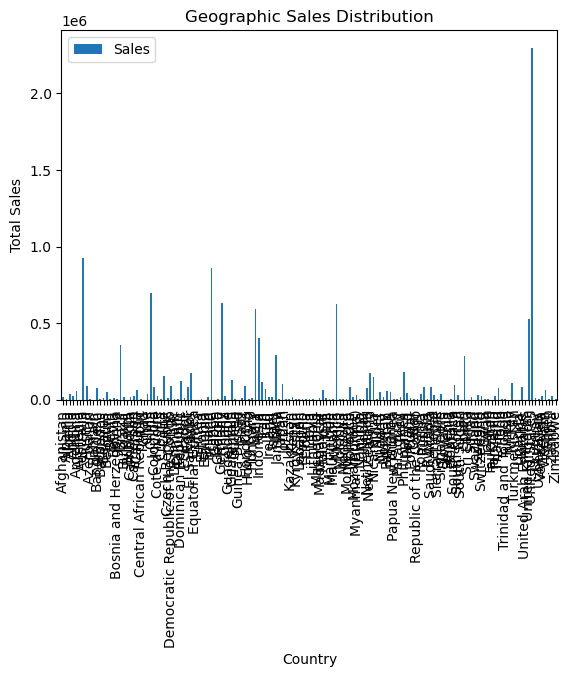

profits: 
 Country
United States     2.297201e+06
Australia         9.252359e+05
France            8.589311e+05
China             7.005620e+05
Germany           6.288400e+05
Mexico            6.225906e+05
India             5.896501e+05
United Kingdom    5.285763e+05
Indonesia         4.048875e+05
Brazil            3.611064e+05
Name: Sales, dtype: float64


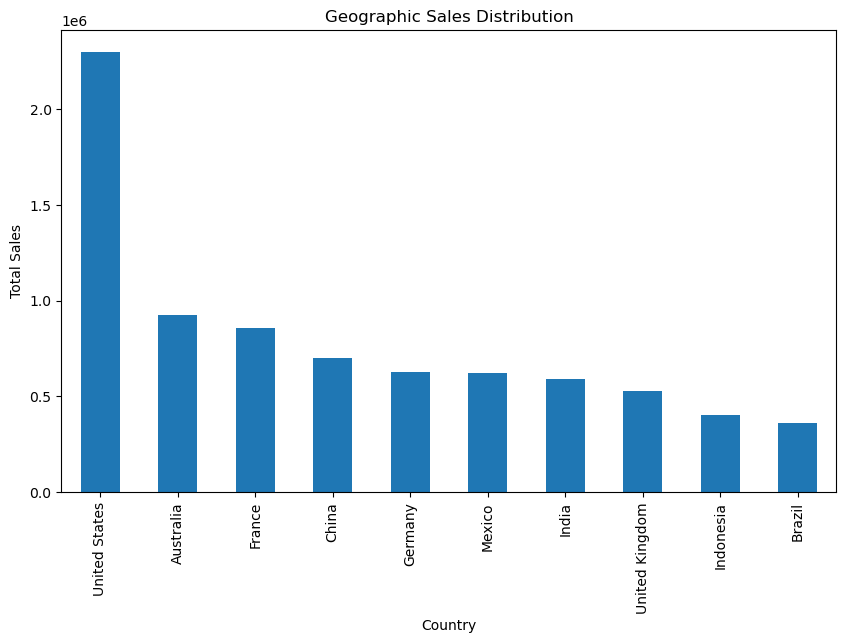

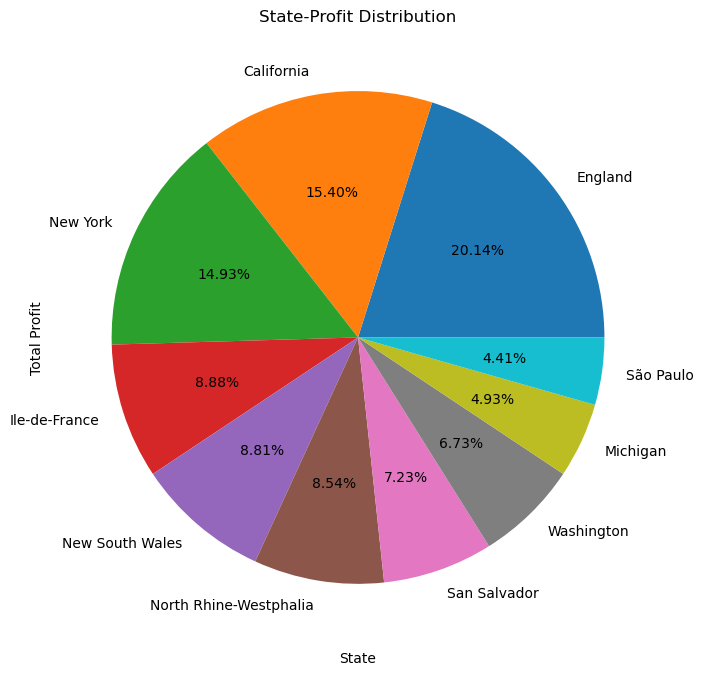

In [22]:
# Perform a geographic analysis
# Group sales data by geographic information such as region or country
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()

# Calculate total sales for each region or country.
print("\ntotal sales for each country: \n", sales_by_country)

# Create a bar chart to represent the distribution of geographic sales
sales_by_country.plot(x='Country', y='Sales', kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Geographic Sales Distribution')
plt.show()

# let us be more specific, whats the top 10?
sales_by_country = df.groupby(["Country"])["Sales"].sum().nlargest(10)
print("profits: \n", sales_by_country)
plt.figure(figsize=(10,6))
sales_by_country.plot.bar()
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Geographic Sales Distribution')
plt.show()

# what about states in terms of profits?
profits_by_states = df.groupby(["State"])["Profit"].sum().nlargest(10)
plt.figure(figsize=(8,8))
profits_by_states.plot.pie( autopct ="%.2f%%")
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.title('State-Profit Distribution')
plt.show()


In [23]:
'''
7. Calculate the monthly income growth rate (in percent) and create a line graph
  showing the growth rate over time.
- Calculate the monthly income for each month.
- Calculate the monthly income growth rate as the percentage change between consecutive months.
- Use Matplotlib to create a line graph showing the monthly revenue growth rate over time.
'''

'\n7. Calculate the monthly income growth rate (in percent) and create a line graph\n  showing the growth rate over time.\n- Calculate the monthly income for each month.\n- Calculate the monthly income growth rate as the percentage change between consecutive months.\n- Use Matplotlib to create a line graph showing the monthly revenue growth rate over time.\n'


monthly_income: 
 Order Date
2011-01    138241.30042
2011-02    134969.94086
2011-03    171455.59372
2011-04    128833.47034
2011-05    148146.72092
2011-06    189338.43966
2011-07    162034.69756
2011-08    219223.49524
2011-09    255237.89698
2011-10    204675.07846
2011-11    214934.29386
2011-12    292359.96752
2012-01    162800.89338
2012-02    152661.15144
2012-03    201608.72784
2012-04    187469.96192
2012-05    218960.16042
2012-06    249289.77172
2012-07    174394.02808
2012-08    271669.66086
2012-09    256567.85308
2012-10    239321.09904
2012-11    270723.05356
2012-12    291972.33306
2013-01    206459.19582
2013-02    191062.77216
2013-03    230547.79468
2013-04    233181.34844
2013-05    304509.96336
2013-06    341162.34370
2013-07    223642.65664
2013-08    323876.60716
2013-09    326897.27044
2013-10    270121.87570
2013-11    383039.21248
2013-12    371245.40880
2014-01    268265.52240
2014-02    244159.30486
2014-03    347720.96868
2014-04    302132.54000
2014-05   

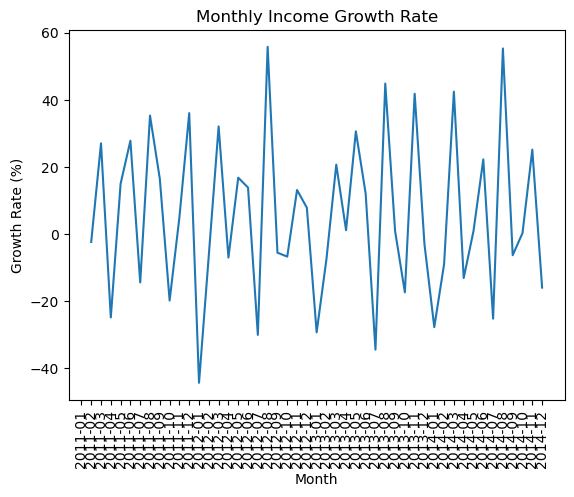

In [24]:
# Group sales data by month and calculate income for each month
monthly_income = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
print("\nmonthly_income: \n", monthly_income)

# Calculate monthly income growth rate as percentage change between consecutive months
monthly_growth_rate = monthly_income.pct_change() * 100
# show monthly growth rate as well as fill NaN or NA with 0.0
print("\nmonthly_growth_rate: \n",  monthly_growth_rate.fillna("0.0"))

# Convert Period objects to strings representing the months
months = [str(month) for month in monthly_growth_rate.index]

# Create a line graph showing the monthly income growth rate over time
plt.plot(months, monthly_growth_rate.values)
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.title('Monthly Income Growth Rate')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



In [25]:
'''
8. Explore the distribution of sales by day of the week and create a line chart 
  to visualize the results. create a bar chart or heat map.
- Extract the day of the week from order dates in the dataset.
- Group the sales data by the day of the week and calculate total sales for each day
- Use Matplotlib to visualize the distribution of sales by day of the week to 
  create a bar chart or heat map.
'''

'\n8. Explore the distribution of sales by day of the week and create a line chart \n  to visualize the results. create a bar chart or heat map.\n- Extract the day of the week from order dates in the dataset.\n- Group the sales data by the day of the week and calculate total sales for each day\n- Use Matplotlib to visualize the distribution of sales by day of the week to \n  create a bar chart or heat map.\n'


day_of_week_sales:
 Order Day
Monday       2.067053e+06
Tuesday      2.150076e+06
Wednesday    1.954614e+06
Thursday     2.057502e+06
Friday       2.144812e+06
Saturday     1.433806e+06
Sunday       8.346382e+05
Name: Sales, dtype: float64


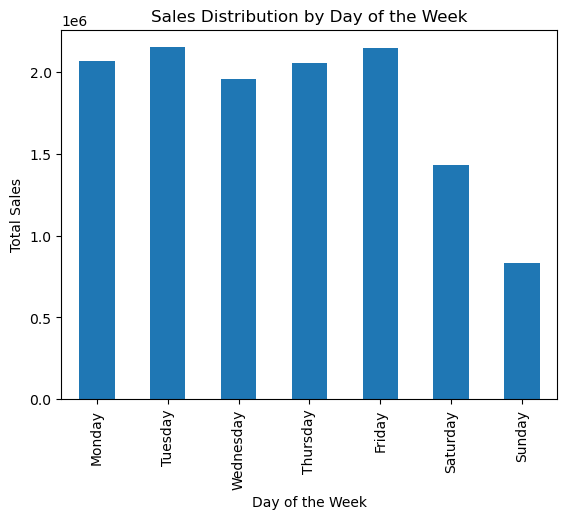

In [26]:
# Explore the distribution of sales by day of the week and create a line chart to visualize the results.
# Extract the day of the week from order dates
df['Order Day'] = df['Order Date'].dt.day_name()
# Specify the desired order of the days of the week
df['Order Day'] = pd.Categorical(df['Order Day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Group sales data by day of the week and calculate total sales for each day
day_of_week_sales = df.groupby('Order Day')['Sales'].sum()
print("\nday_of_week_sales:\n", day_of_week_sales)

# Create a bar chart to visualize the distribution of sales by day of the week
day_of_week_sales.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Day of the Week')
plt.show()


In [27]:
'''
9. Identify the most valuable customers by analyzing customer loyalty. 
- Group customers by purchase quantity and calculate the total purchase quantity for each customer. 
- To identify the most valuable customers, select the customers with the highest purchase quantity.
- List the credentials of these customers and their total purchase quantity.
'''

'\n9. Identify the most valuable customers by analyzing customer loyalty. \n- Group customers by purchase quantity and calculate the total purchase quantity for each customer. \n- To identify the most valuable customers, select the customers with the highest purchase quantity.\n- List the credentials of these customers and their total purchase quantity.\n'

In [28]:
# Group customers by purchase amount
customer_purchases = df.groupby('Customer ID')['Quantity'].sum().reset_index()
print("\ncustomer_purchases: \n", customer_purchases.head(5))

# Identify the most valuable customers (highest purchase volume)
most_valuable_customers = customer_purchases.nlargest(5, 'Quantity')
# Select the customers with the highest purchase quantity.
print(most_valuable_customers)

# Merge most_valuable_customers credentials with original df to include this additional columns
most_valuable_customers = most_valuable_customers.merge(df[['Customer ID', 'Customer Name']], on='Customer ID', how='left')
# Drop duplicate rows
most_valuable_customers = most_valuable_customers.drop_duplicates()
# List the credentials of these customers and their total purchase amount
print(most_valuable_customers)



customer_purchases: 
   Customer ID  Quantity
0    AA-10315       145
1    AA-10375       139
2    AA-10480       150
3    AA-10645       267
4      AA-315        20
     Customer ID  Quantity
150     BE-11335       398
733     JG-15805       364
538     EM-13960       359
1206    PO-18850       354
1459    SW-20755       339
    Customer ID  Quantity    Customer Name
0      BE-11335       398      Bill Eplett
94     JG-15805       364       John Grady
184    EM-13960       359     Eric Murdock
269    PO-18850       354  Patrick O'Brill
366    SW-20755       339      Steven Ward


In [29]:
'''
10.Create a sales report with key findings and insights from the analysis. Include relevant 
  visualizations and explanations for trends or patterns observed in the data. Provide.
- A Jupyter Notebook with key findings and information from the analysis (.ipynb) file and 
  generate a report as a PDF document.
- Include relevant visualizations created during the analysis.
- Explanations or comments for trends or patterns observed in the data Provide.
'''

'\n10.Create a sales report with key findings and insights from the analysis. Include relevant \n  visualizations and explanations for trends or patterns observed in the data. Provide.\n- A Jupyter Notebook with key findings and information from the analysis (.ipynb) file and \n  generate a report as a PDF document.\n- Include relevant visualizations created during the analysis.\n- Explanations or comments for trends or patterns observed in the data Provide.\n'

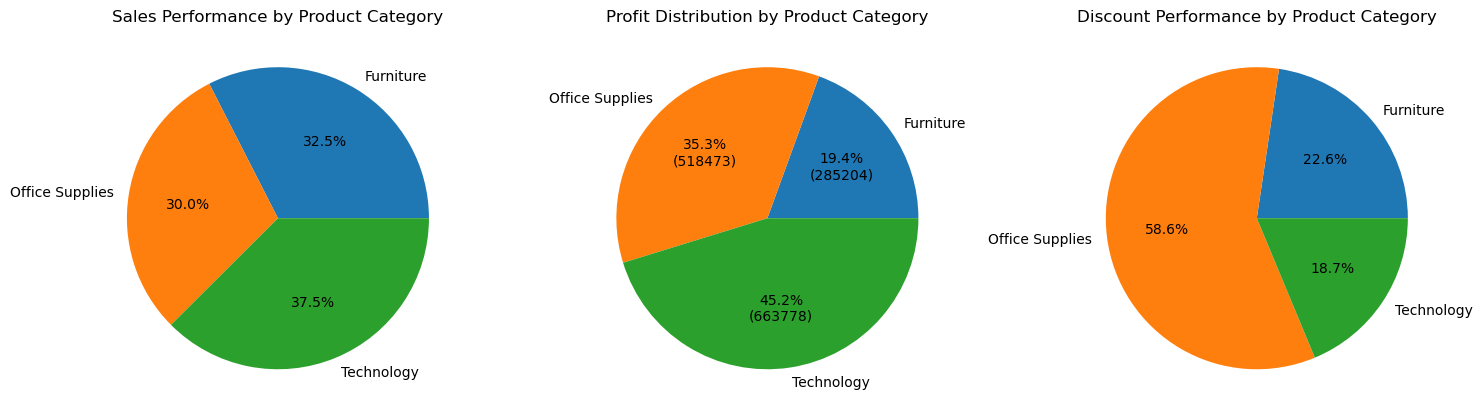

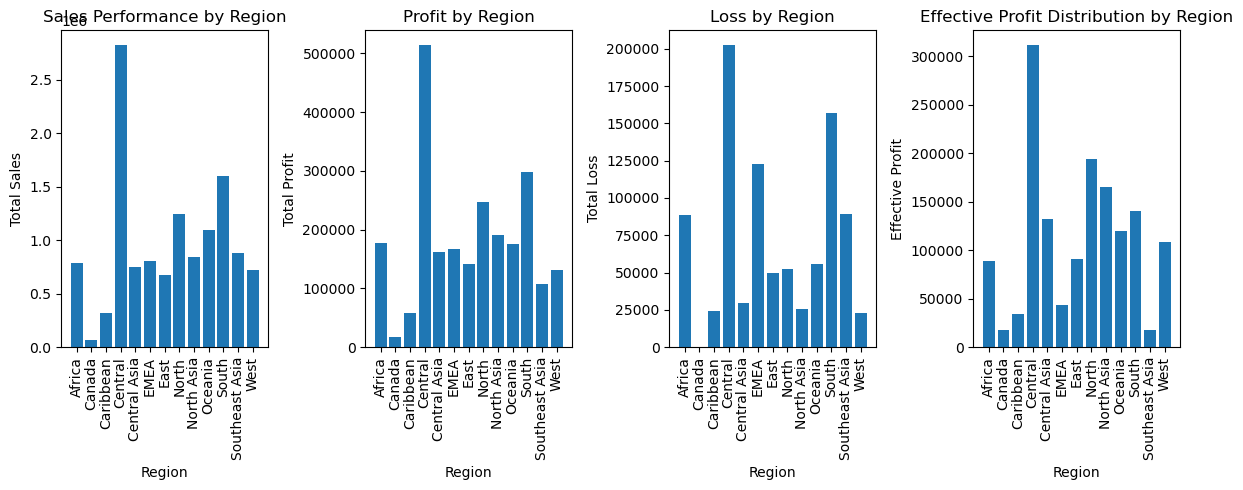

Number of one-time customers: 17

The avg shipping cost distribution for top 3 different countries: 
          Shipping Cost
Country               
Taiwan      155.660714
Chad        148.970000
Lesotho     135.650000

Top-5 most profitable customers. 
       Customer ID  Customer Name
8898     TC-20980   Tamara Chand
38848    RB-19360   Raymond Buch
29946    HL-15040   Hunter Lopez
30124    AB-10105  Adrian Barton
37929    SC-20095   Sanjit Chand


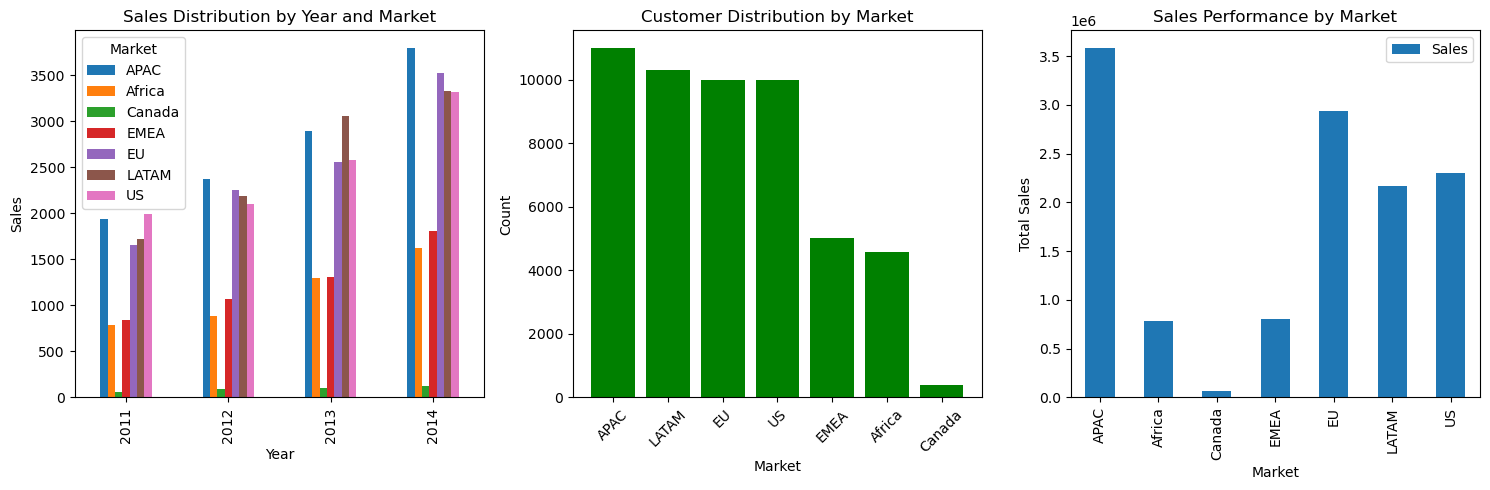

<Figure size 1600x800 with 0 Axes>

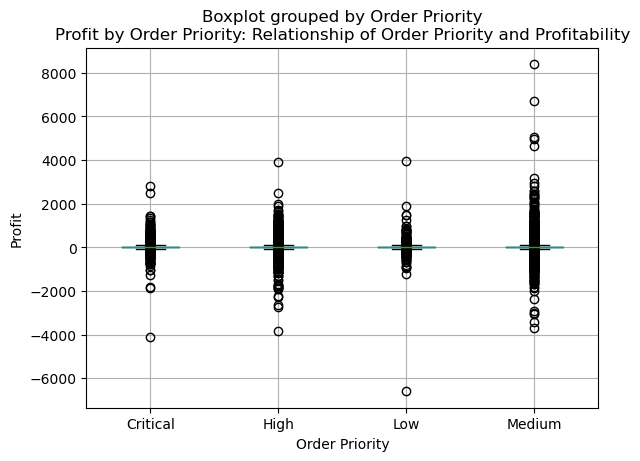

In [30]:
# Group the sales data by product category and calculate the total sales for each category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
# Calculate the percentage of each category's sales
sales_by_category['Percentage'] = sales_by_category['Sales'] / sales_by_category['Sales'].sum() * 100
# Group the profit data by product category and calculate the total profit for each category
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
# Group the discount data by product category and calculate the total discount for each category
discount_by_category = df.groupby('Category')['Discount'].sum().reset_index()
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# Plot the sales pie chart
axes[0].pie(sales_by_category['Sales'], labels=sales_by_category['Category'], autopct='%1.1f%%')
axes[0].set_title('Sales Performance by Product Category')
# Plot the profit pie chart
axes[1].pie(profit_by_category['Profit'], labels=profit_by_category['Category'], autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*sum(profit_by_category['Profit'])):.0f})")
axes[1].set_title('Profit Distribution by Product Category')
# Plot the discount pie chart
axes[2].pie(discount_by_category['Discount'], labels=discount_by_category['Category'], autopct='%1.1f%%')
axes[2].set_title('Discount Performance by Product Category')
# Adjust the spacing between subplots
plt.tight_layout()
# Display the figure
plt.show()




# Group the sales data by region and calculate the total sales for each region
effective_profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
df_profit_loss_analysis = df.copy()
# Create a new column "Loss" in the DataFrame
df_profit_loss_analysis['Loss'] = 0
# Update the "Loss" and "Profit" columns based on the condition
df_profit_loss_analysis.loc[df_profit_loss_analysis['Profit'] < 0, 'Loss'] = -df_profit_loss_analysis['Profit']
df_profit_loss_analysis.loc[df_profit_loss_analysis['Profit'] < 0, 'Profit'] = 0
# Group the profit data by region and calculate the total profit for each region
profit_by_region = df_profit_loss_analysis.groupby('Region')['Profit'].sum().reset_index()
# Group the loss data by region and calculate the total loss for each region
loss_by_region = df_profit_loss_analysis.groupby('Region')['Loss'].sum().reset_index()
# Create a figure with two subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 5))
# Plot the sales performance by region in the first subplot
axs[0].bar(sales_by_region['Region'], sales_by_region['Sales'])
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Total Sales')
axs[0].set_title('Sales Performance by Region')
axs[0].tick_params(axis='x', rotation=90)
# Plot the profit by region in the second subplot
axs[1].bar(profit_by_region['Region'], profit_by_region['Profit'])
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Total Profit')
axs[1].set_title('Profit by Region')
axs[1].tick_params(axis='x', rotation=90)
# Plot the loss performance by region in the third subplot
axs[2].bar(loss_by_region['Region'], loss_by_region['Loss'])
axs[2].set_xlabel('Region')
axs[2].set_ylabel('Total Loss')
axs[2].set_title('Loss by Region')
axs[2].tick_params(axis='x', rotation=90)
# Plot the Effective profit performance by region in the forth subplot
axs[3].bar(effective_profit_by_region['Region'], effective_profit_by_region['Profit'])
axs[3].set_xlabel('Region')
axs[3].set_ylabel('Effective Profit')
axs[3].set_title('Effective Profit Distribution by Region')
axs[3].tick_params(axis='x', rotation=90)
# Adjust the spacing between subplots
plt.tight_layout()
# Display the combined figure
plt.show()



# Who are our top-5 oldest customers
# print("\ntop-5 oldest customers:\n", df.sort_values(["Order Date"],ascending=True).iloc[0:7,:]["Customer Name"].unique())

# customers that only visited once and never came back again.
# How many customers have visited this store just once?
# we need to know unique order ids because there could be multiple items in an order.
unique_visits = df.groupby('Customer ID')['Order ID'].nunique()
customers_once = unique_visits[unique_visits == 1].index
# Filter the original DataFrame to include only customers who visited once
df_once = df[df['Customer ID'].isin(customers_once)]
# Print the shape and example rows of the DataFrame with one-time customers
print("Number of one-time customers:", df_once.shape[0])
# print("Sample rows of one-time customers:")
# print(df_once.head())



# find out the avg shipping cost distribution for top 3 different countries
# The final result is a DataFrame that shows the top-3 countries with the highest average shipping cost.
print("\nThe avg shipping cost distribution for top 3 different countries: \n", 
      df.groupby('Country').agg({'Shipping Cost':'mean'}).sort_values('Shipping Cost', ascending=False).head(3))




# Who are the top-5 most profitable customers.
# the customers with the highest profit values will appear at the top of the resulting DataFrame.
data5=df.sort_values('Profit',ascending=False).head(5)[['Customer ID','Customer Name']]
print("\nTop-5 most profitable customers. \n", data5)



# Distribution of sales in market and across the years
Marketsales = df.groupby([df['Order Date'].dt.year, 'Market']).size().reset_index(name='count').sort_values('count', ascending=False).rename(columns={'Order Date': 'Year', 'count': 'Sales'})
# Distribution of customers market-wise
ascending_order = df['Market'].value_counts().index
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot the distribution of sales in market and across the years
groups = Marketsales.groupby(["Year", "Market"])["Sales"].sum().unstack()
groups.plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Sales')
axs[0].set_title('Sales Distribution by Year and Market')
axs[0].legend(title='Market')
# Plot the distribution of customers market-wise
axs[1].bar(ascending_order, df['Market'].value_counts(), color='green')
axs[1].set_xlabel('Market')
axs[1].set_ylabel('Count')
axs[1].set_title('Customer Distribution by Market')
axs[1].tick_params(axis='x', rotation=45)
# Plot the sales performance by market
sales_by_market = df.groupby('Market')['Sales'].sum().reset_index()
sales_by_market.plot(x='Market', y='Sales', kind='bar', stacked=True, ax=axs[2])
axs[2].set_xlabel('Market')
axs[2].set_ylabel('Total Sales')
axs[2].set_title('Sales Performance by Market')
# Adjust the spacing between subplots
plt.tight_layout()
# Display the combined figure
plt.show()



# Relationship of Order Priority and Profitability
plt.figure(figsize=(16,8))
fig, ax = plt.subplots()
df.boxplot(column='Profit', by='Order Priority', ax=ax)
plt.xlabel('Order Priority')
plt.ylabel('Profit')
plt.title('Profit by Order Priority: Relationship of Order Priority and Profitability')
plt.show()
# Profits slightly higher when Order priority is Medium

